In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.data', names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'])
df

SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]

In [3]:
df[df.duplicated()]

SepalLength  SepalWidth  PetalLength  PetalWidth           Class
34           4.9         3.1          1.5         0.1     Iris-setosa
37           4.9         3.1          1.5         0.1     Iris-setosa
142          5.8         2.7          5.1         1.9  Iris-virginica

In [4]:
df['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

EDA

<Axes: title={'center': 'Species Count'}, xlabel='Class', ylabel='count'>

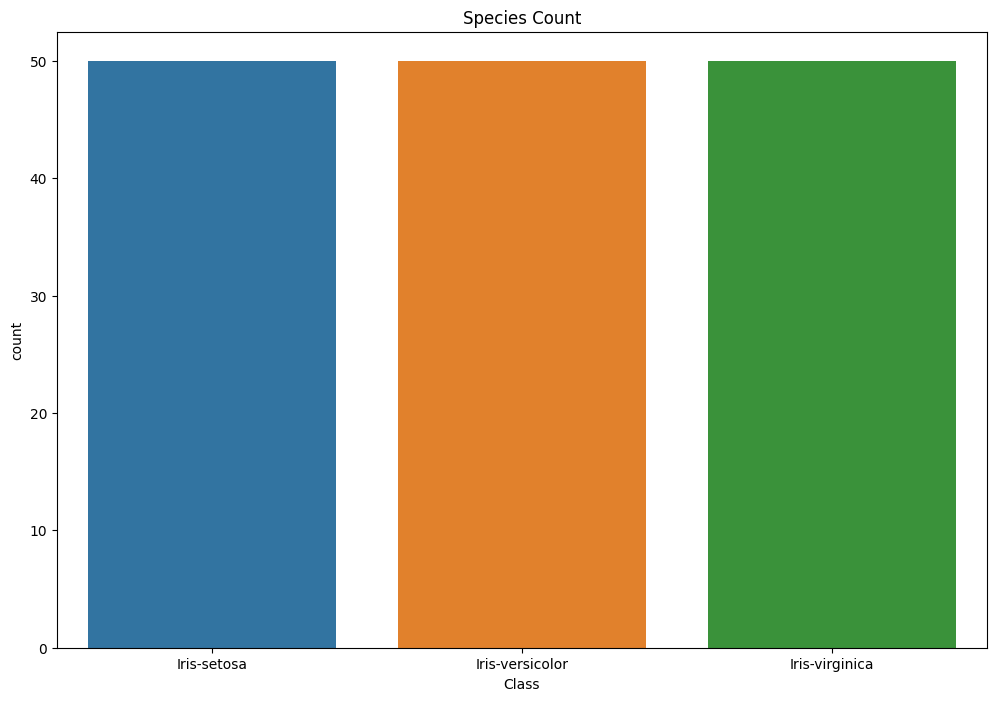

In [5]:
plt.figure(figsize=(12,8))
plt.title('Species Count')
sns.countplot(data=df, x=df['Class'])

<Figure size 1200x800 with 0 Axes>

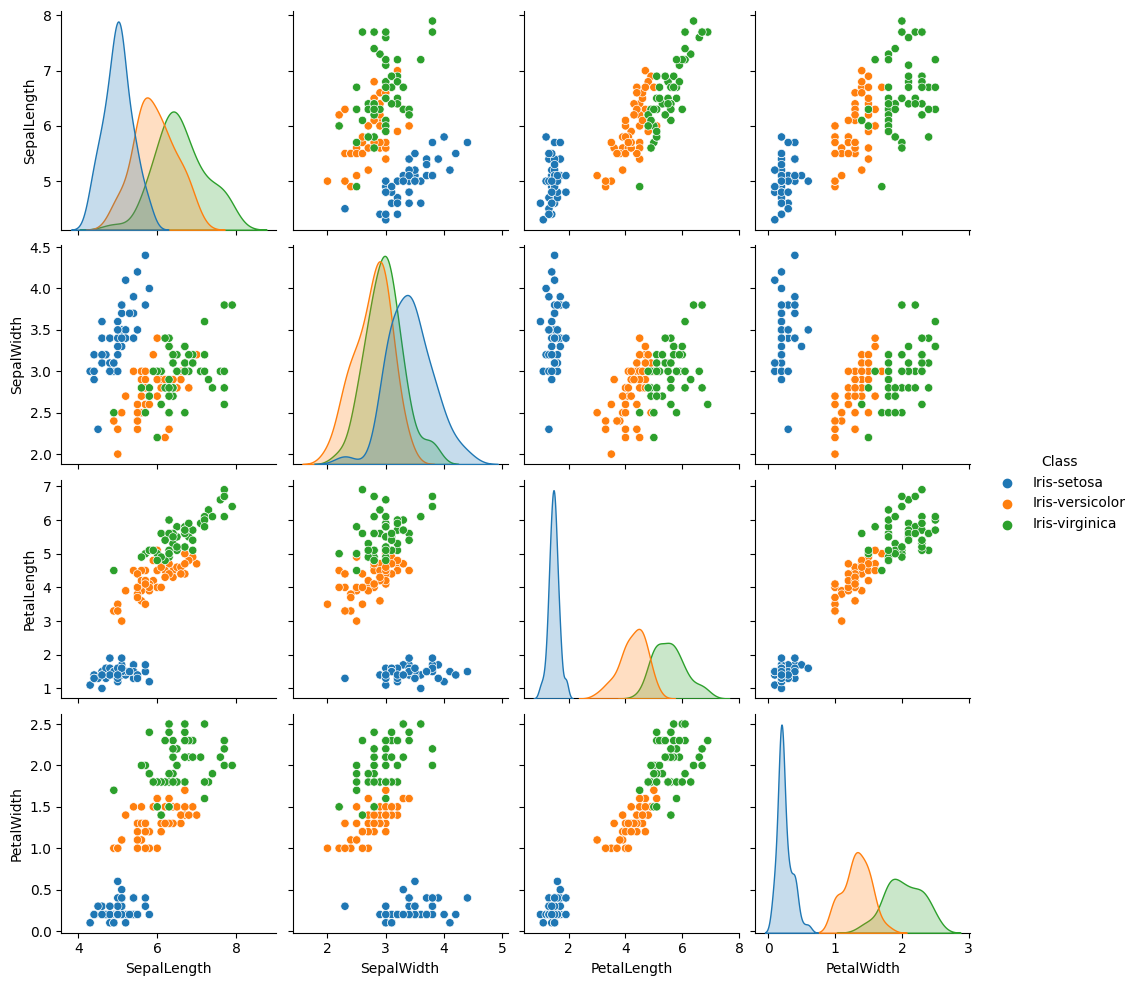

In [6]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='Class')

In [7]:
df_noclass = df.drop(labels='Class', axis=1)

In [8]:
df_noclass.corr()

SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000

<Axes: >

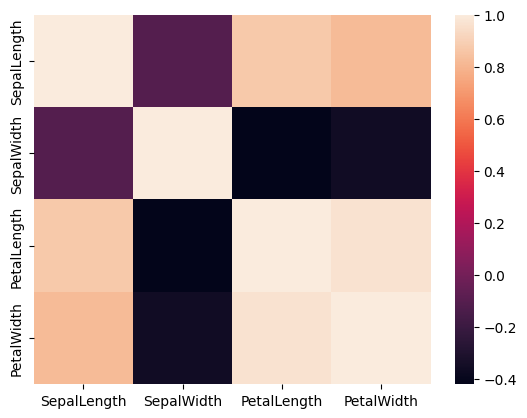

In [9]:
sns.heatmap(df_noclass.corr())

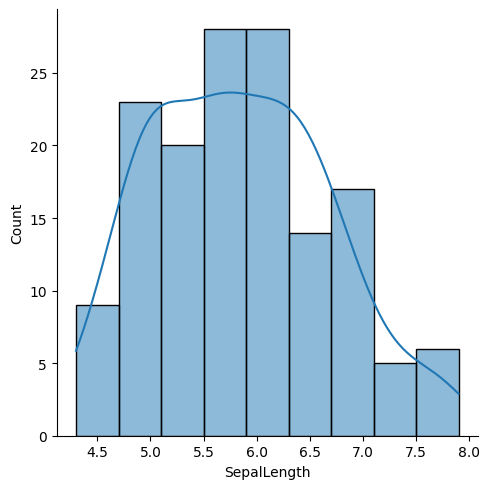

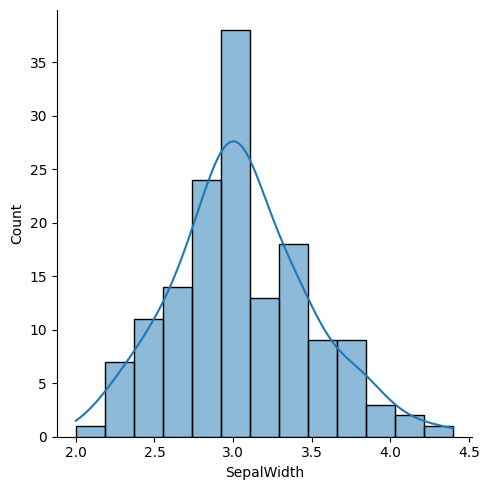

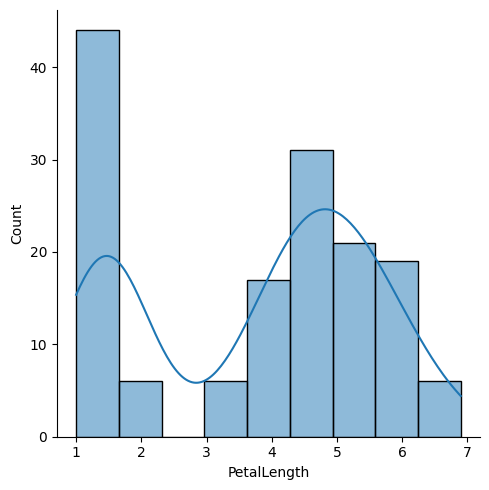

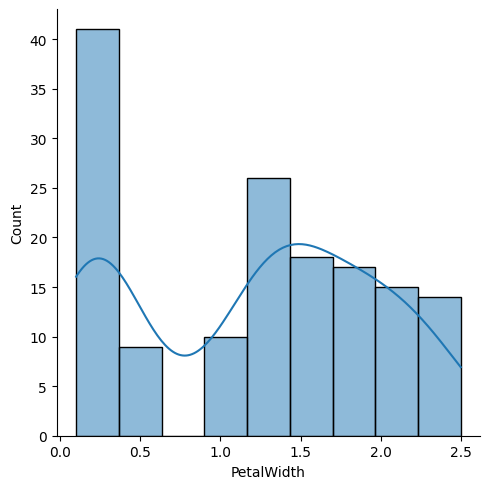

In [10]:
for col_name in df.columns.unique():
    if col_name != 'Class':
        sns.displot(df[col_name], kde=True)

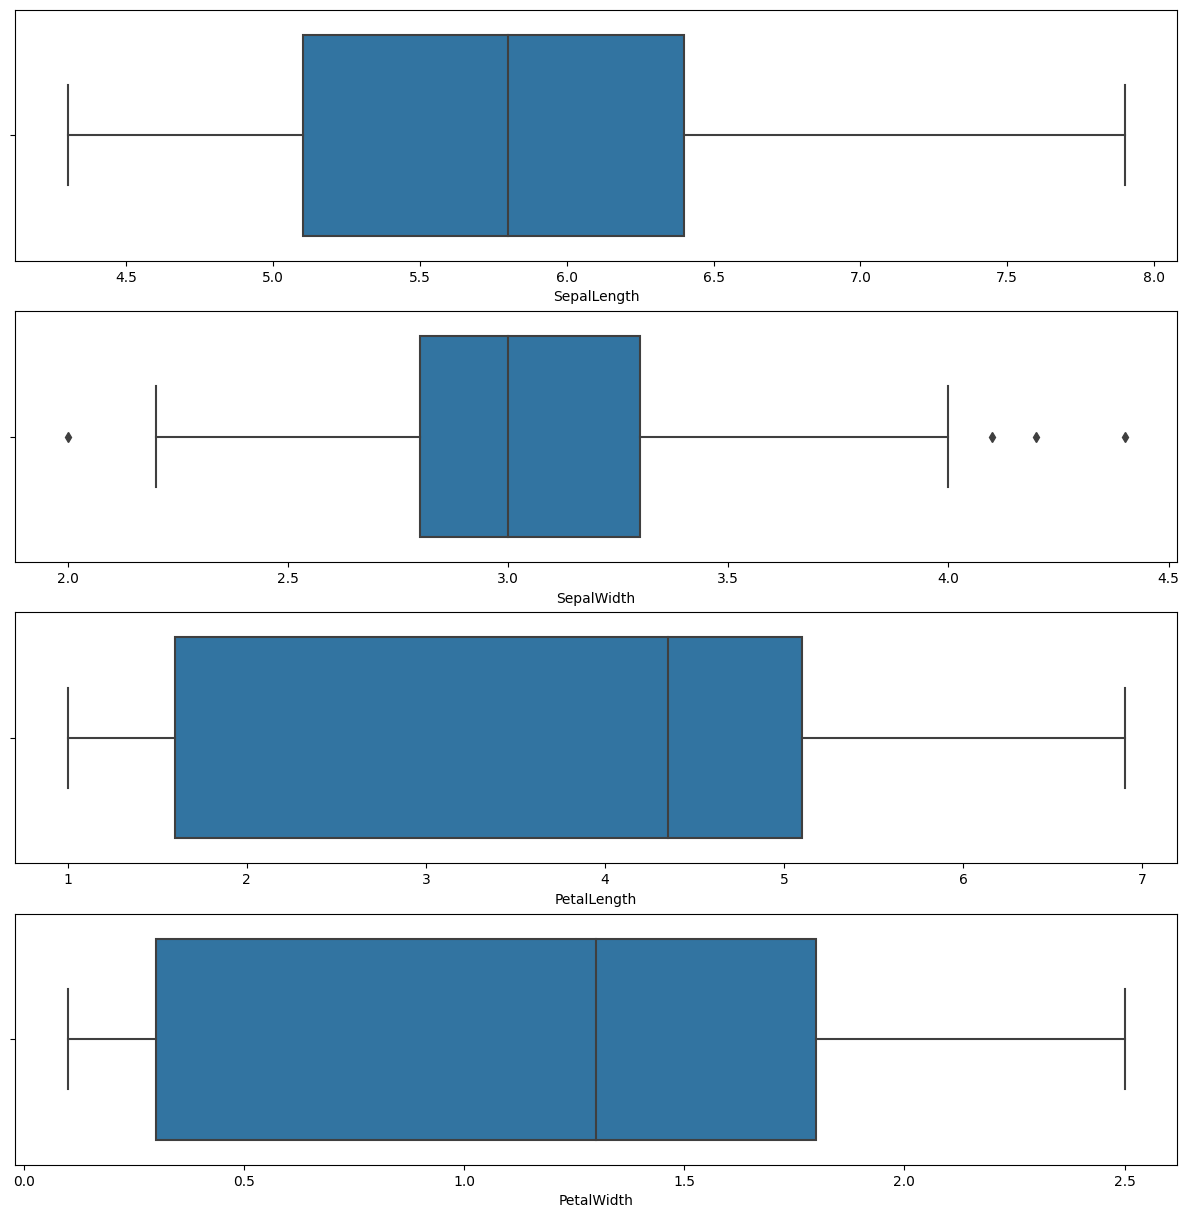

In [11]:
i = 0
f,axes = plt.subplots(4, figsize=(15,15))
for col in (df.columns.unique()):
    if col != 'Class':
        sns.boxplot(x=col, data=df, ax=axes[i])
        i = i+1

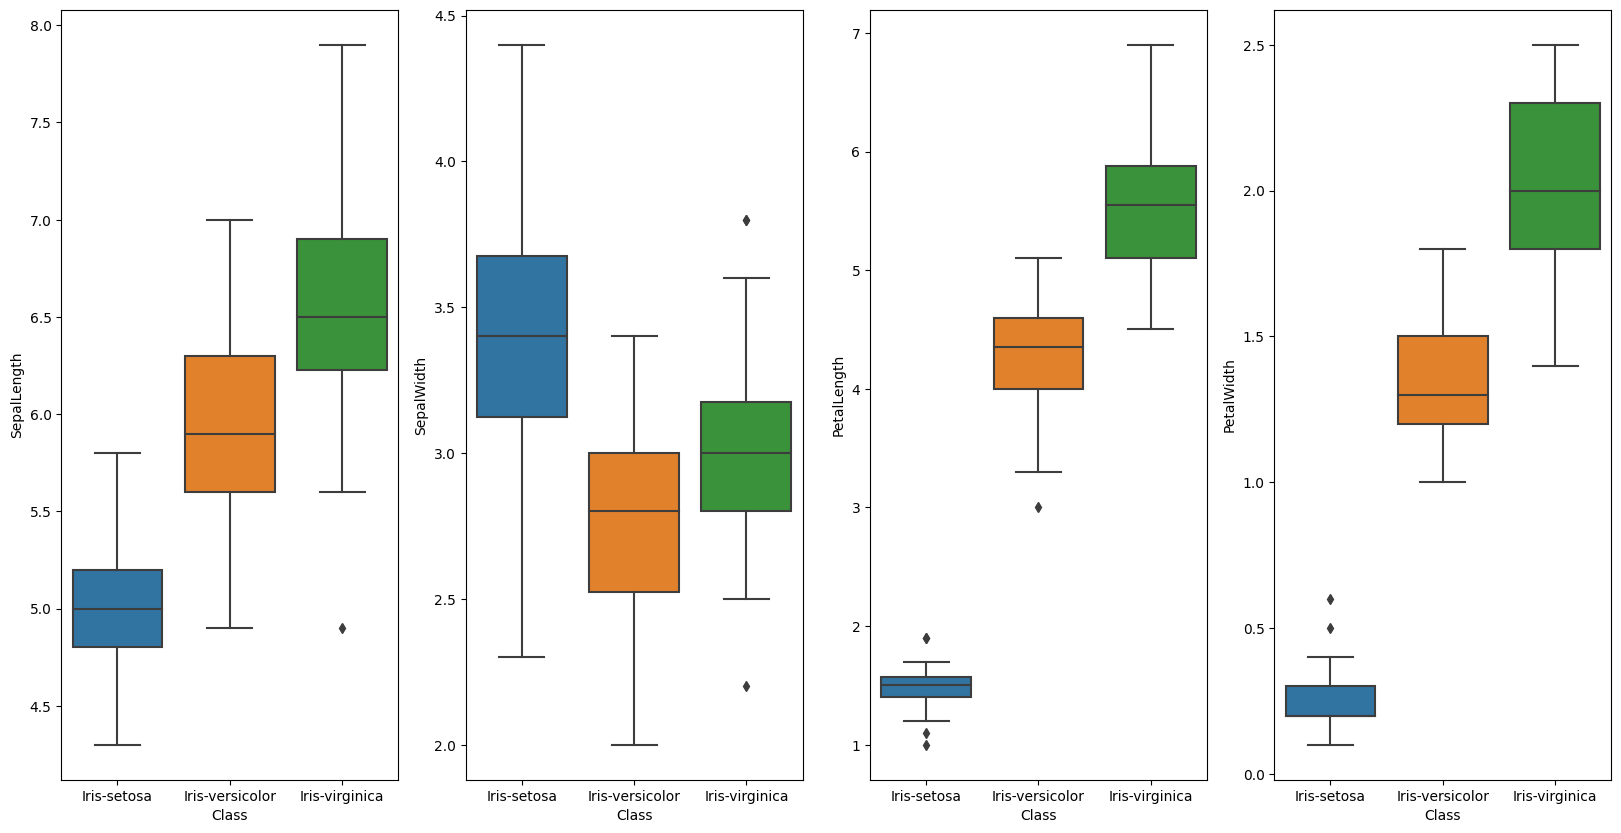

In [12]:
i = 0
f,axes = plt.subplots(1,4, figsize=(20,10))
for col in df.columns.unique():
    if col != 'Class':
        sns.boxplot(x='Class', y=col, data=df, ax=axes[i])
        i = i+1

Outliner is a data that are extreme values that might do not match with the rest of the dataset

In [13]:
setosa_df = df[df['Class'] == 'Iris-setosa']
setosa_df['PetalLength'].quantile(0.97)

1.806

In [14]:
setosa_df['PetalLength'].quantile(0.03)

1.147

In [15]:
df[(df['Class']== 'Iris-setosa') & (df['PetalLength']>setosa_df['PetalLength'].quantile(0.97)) | (df['PetalLength']<setosa_df['PetalLength'].quantile(0.03))]

SepalLength  SepalWidth  PetalLength  PetalWidth        Class
13          4.3         3.0          1.1         0.1  Iris-setosa
22          4.6         3.6          1.0         0.2  Iris-setosa
24          4.8         3.4          1.9         0.2  Iris-setosa
44          5.1         3.8          1.9         0.4  Iris-setosa

In [16]:
df.drop(index=[13,22,24,44]).head(15)

SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa
12          4.8         3.0          1.4         0.1  Iris-setosa
14          5.8         4.0          1.2         0.2  Iris-setosa
15          5.7         4.4          1.5         0.4  Iris-setosa

In [17]:
df_titanic = pd.read_csv('train.csv')
df_titanic.head(5)

PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df_titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

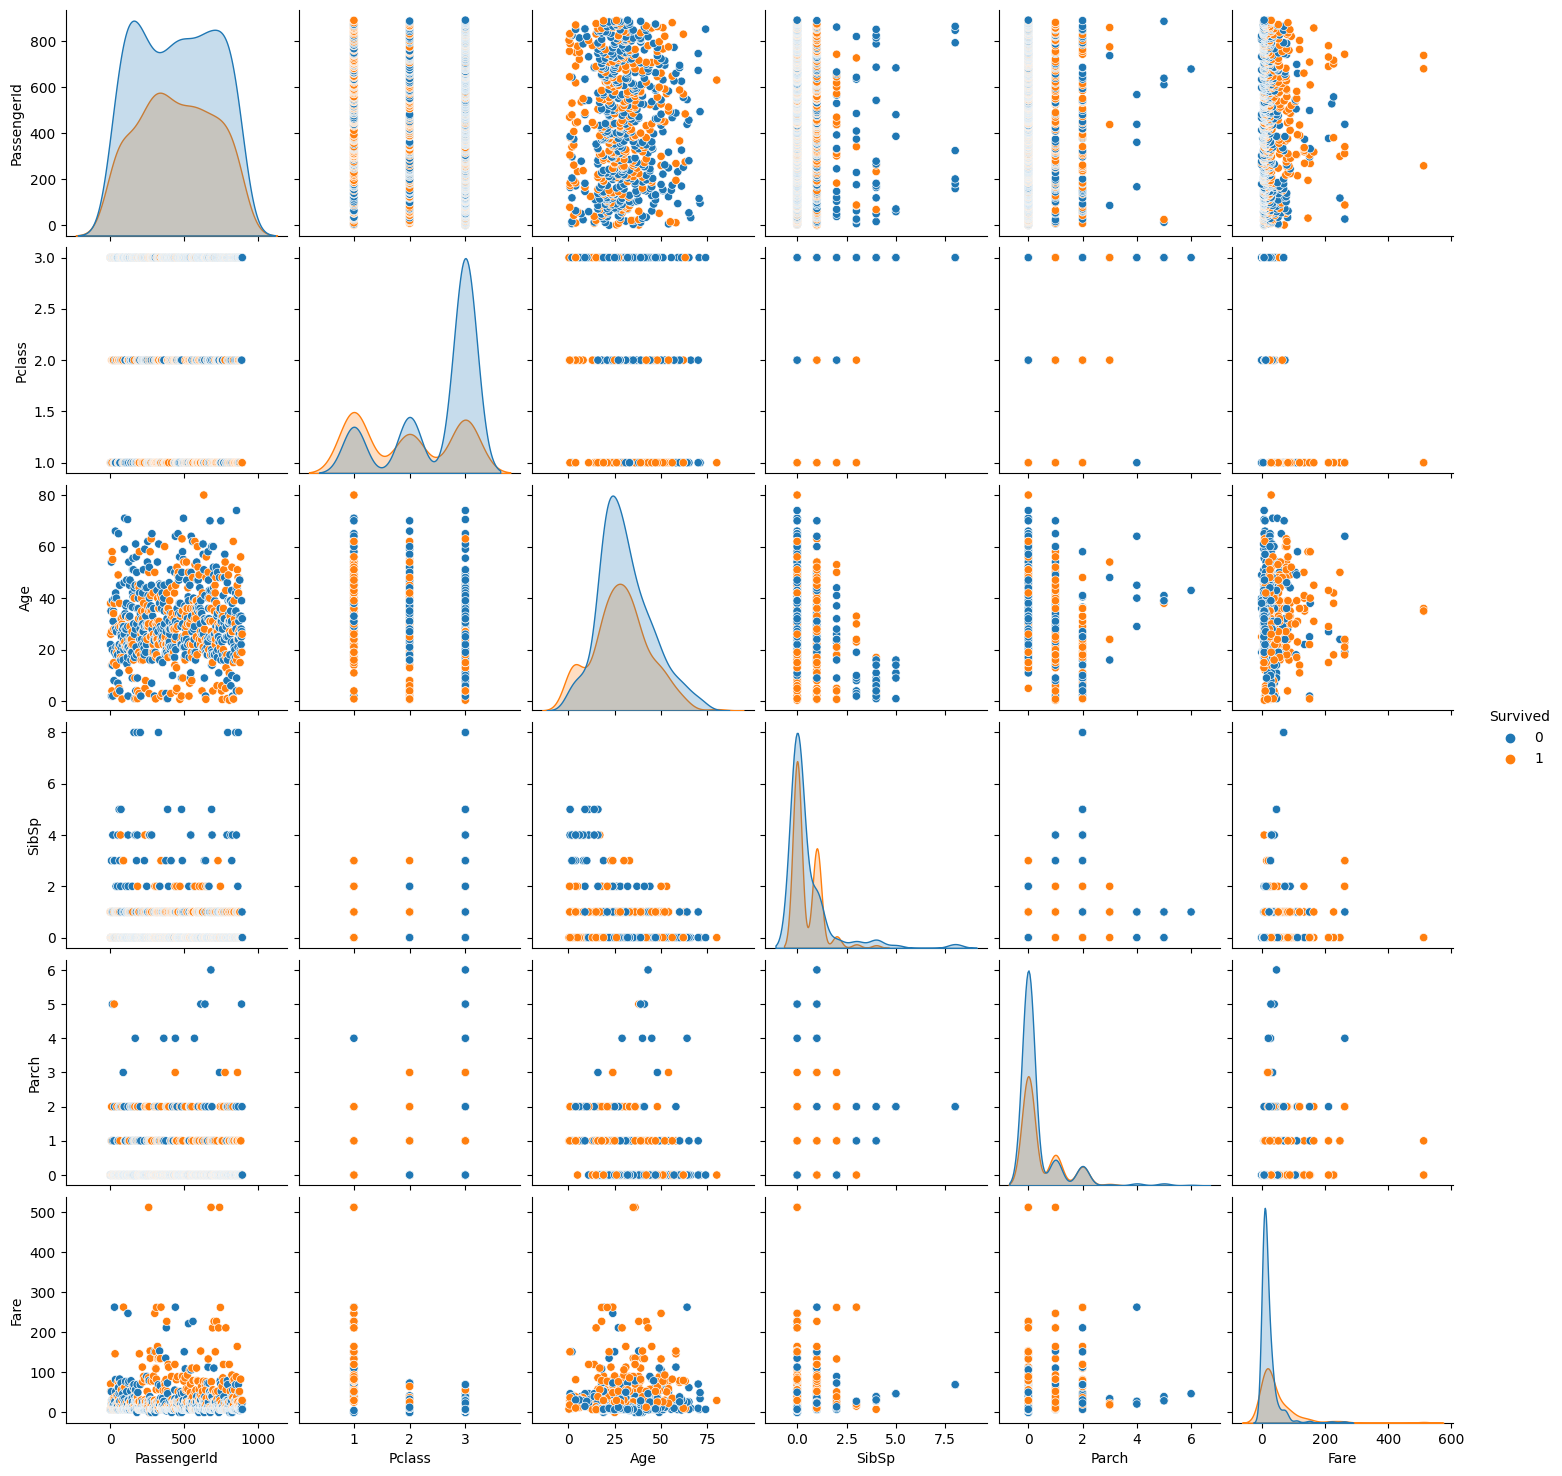

In [21]:
sns.pairplot(df_titanic, hue='Survived')

<Axes: >

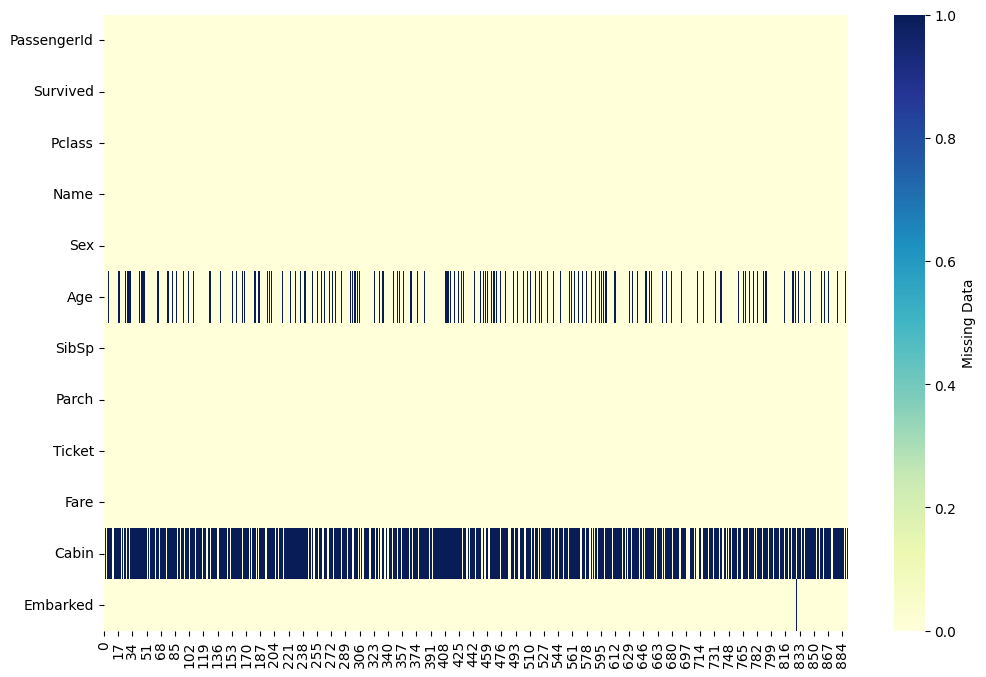

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df_titanic.isna().transpose(), cmap='YlGnBu', cbar_kws={'label':'Missing Data'})

In [23]:
df_titanic.drop(columns=['Cabin', 'Ticket', 'PassengerId'], inplace=True)

In [24]:
df_titanic

Survived  Pclass                                               Name   
0           0       3                            Braund, Mr. Owen Harris  \
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Embarked  
0      male  22.0      1      0   7.2500        S  
1    female  38.0      1      0  71.2833        C  
2    female  26.0      0      0   7.9250        S  
3    female  35.0      1      0  53.1000        S  
4      male  35.0      0      0   8.0500        S  
..      ...   ...    ...    ...      ...      ...  
886    male  27.0      0      0  13.0000        S  
887  female  19.0      0      0  30.0000        S  
888  female   NaN      1      2  23.4500        S  
889    male  26.0      0      0  30.0000        C  
890    male  32.0      0      0   7.7500        Q  

[891 rows x 9 columns]

<Axes: xlabel='Survived', ylabel='count'>

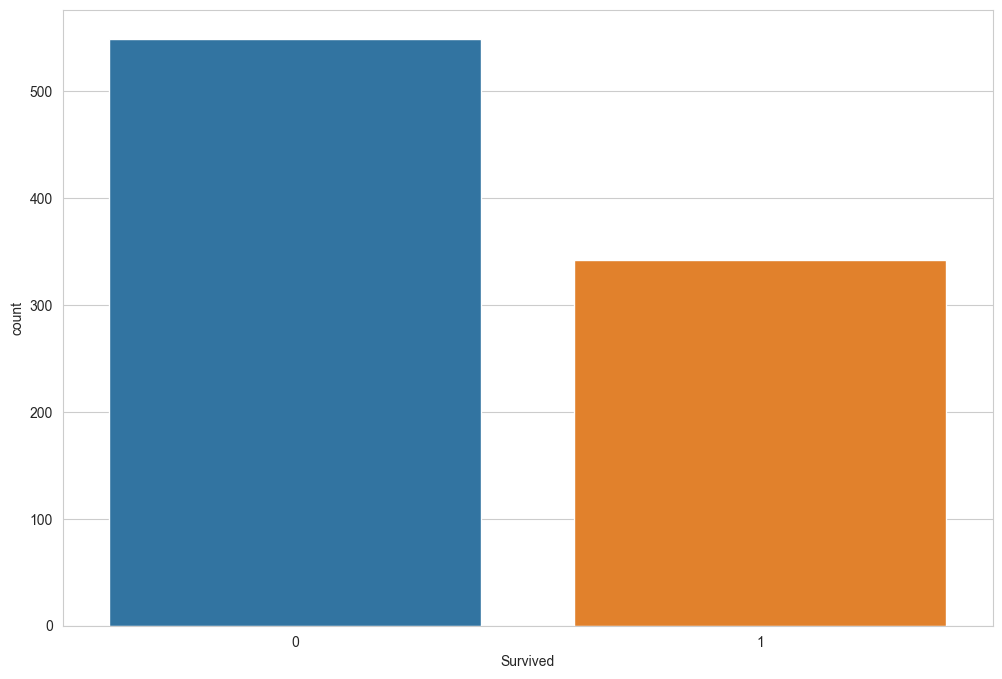

In [25]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df_titanic)

hue can be used to add a parameter 

<Axes: xlabel='Survived', ylabel='count'>

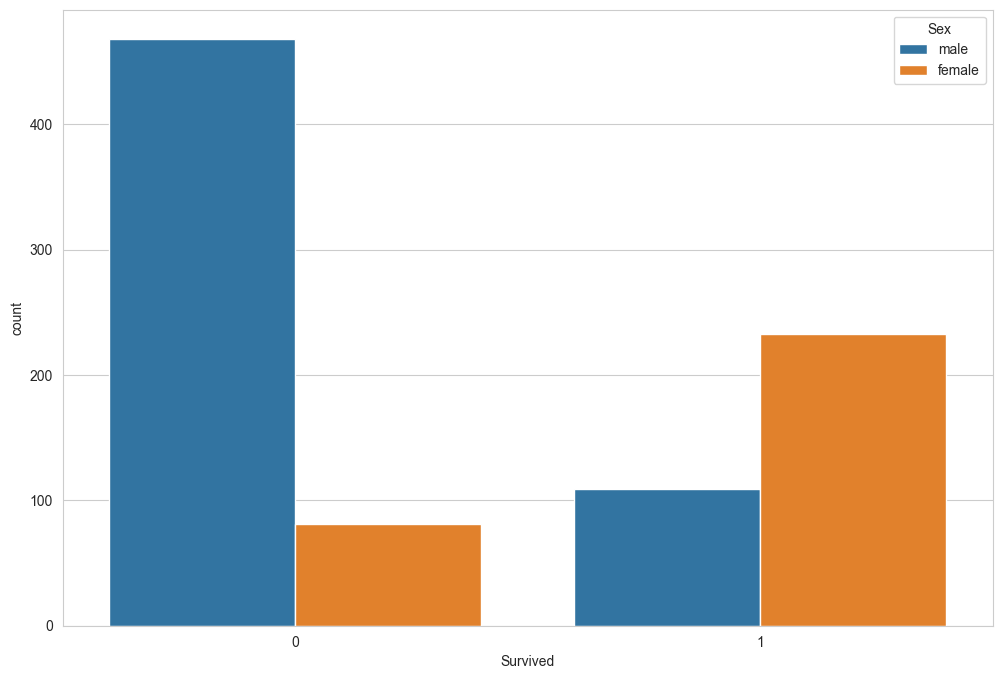

In [26]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df_titanic)

<Axes: xlabel='Survived', ylabel='count'>

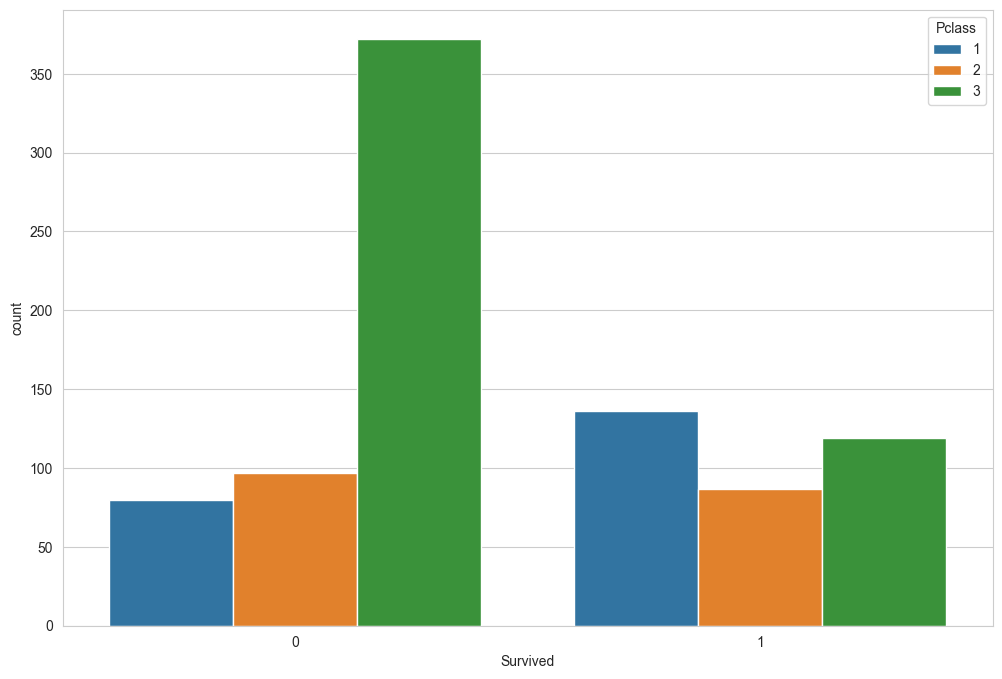

In [27]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df_titanic)

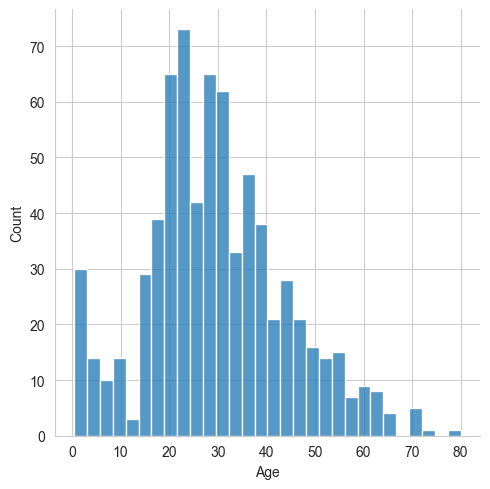

In [28]:
sns.displot(df_titanic['Age'].dropna(), kde=False, bins=30)

<Axes: xlabel='Survived', ylabel='count'>

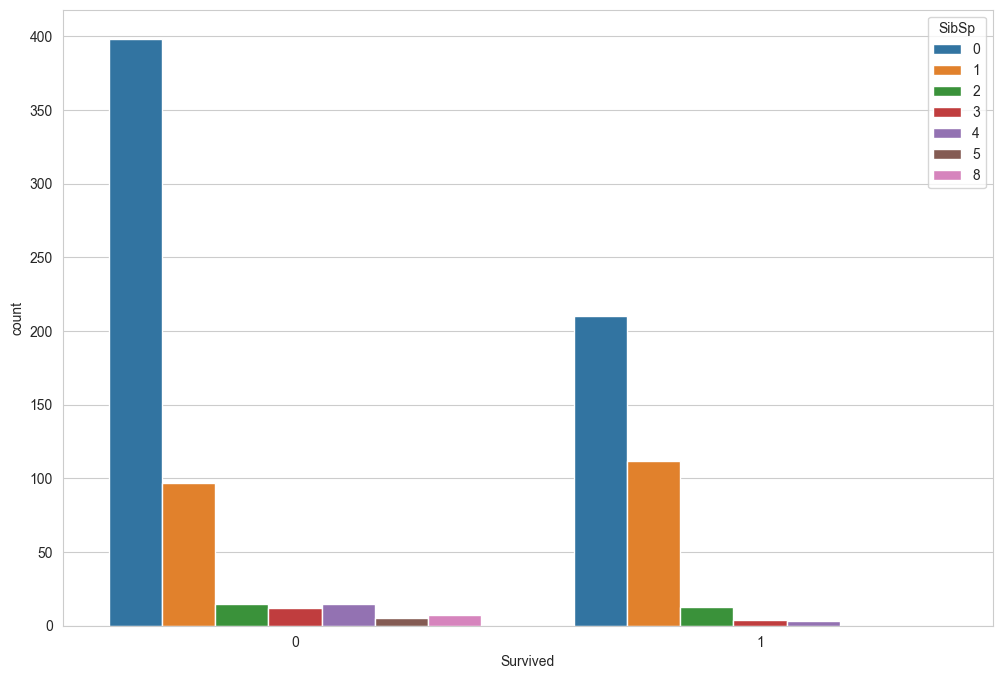

In [29]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='SibSp', data=df_titanic)

<Axes: >

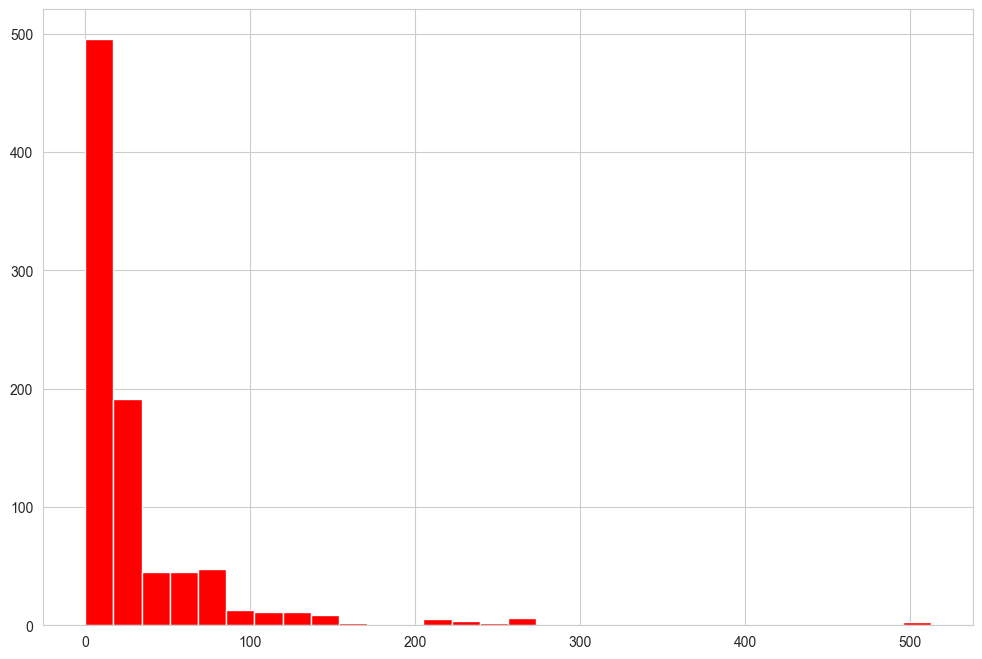

In [30]:
df_titanic['Fare'].hist(color='red', bins=30, figsize=(12,8))

<Axes: xlabel='Fare', ylabel='Count'>

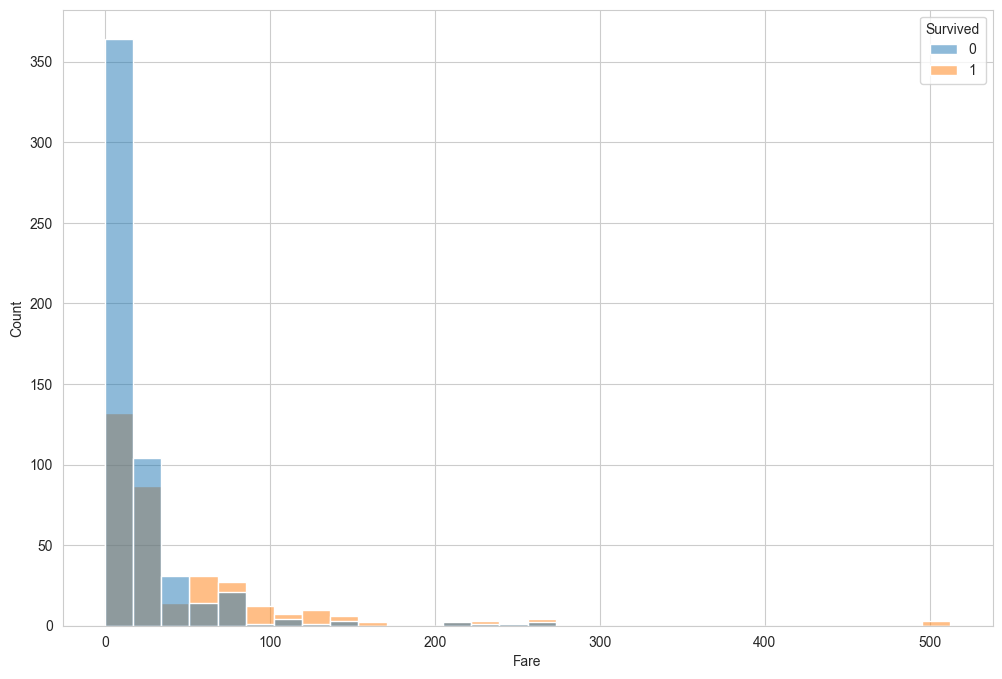

In [31]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.histplot(x='Fare', hue='Survived', data=df_titanic, bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

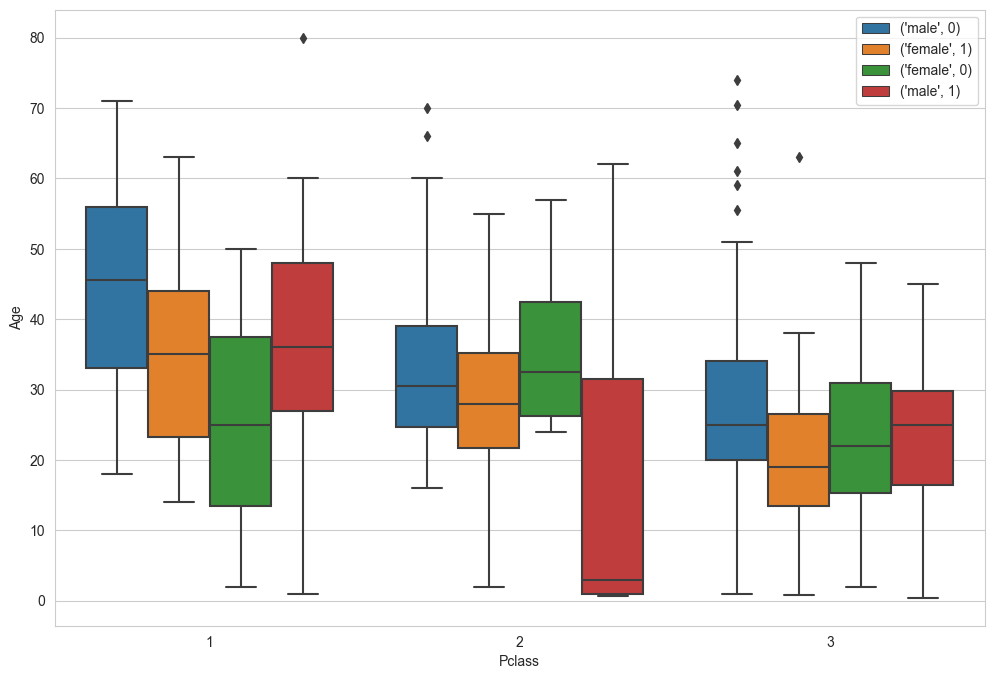

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', hue=df_titanic[['Sex','Survived']].apply(tuple, axis=1),data=df_titanic)

In [33]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Survived = cols[2]
    gender = cols[3]
    
    if pd.isnull(Age):
        if Pclass == 1 and Survived == 0 and gender == 'male':
            return 46
        elif Pclass == 1 and Survived == 1 and gender == 'male':
            return 35
        elif Pclass == 1 and Survived == 0 and gender == 'female':
            return 25
        elif Pclass == 1 and Survived == 1 and gender == 'female':
            return 35
        elif Pclass == 2 and Survived == 0 and gender == 'male':
            return 31
        elif Pclass == 2 and Survived == 1 and gender == 'male':
            return 3
        elif Pclass == 2 and Survived == 0 and gender == 'female':
            return 33
        elif Pclass == 2 and Survived == 1 and gender == 'female':
            return 28
        elif Pclass == 3 and Survived == 0 and gender == 'male':
            return 25
        elif Pclass == 3 and Survived == 1 and gender == 'male':
            return 25
        elif Pclass == 3 and Survived == 0 and gender == 'female':
            return 22
        elif Pclass == 3 and Survived == 1 and gender == 'female':
            return 19
        else:
            return(Age)
    else:
        return(Age)

In [34]:
df_titanic['Age'] = df_titanic[['Age', 'Pclass', 'Survived', 'Sex']].apply(inpute_age, axis=1)

In [37]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [43]:
df_titanic.shape

(891, 10)

In [39]:
def name_title(name):
    if('Mr') in name:
        return ('Mr')
    elif('Mrs') in name:
        return ('Mrs')
    elif('Miss') in name:
        return ('Miss')
    elif('Rev') in name:
        return ('Rev')
    else:
        return(np.nan)

In [44]:
df_titanic['title'] =df_titanic['Name'].apply(name_title)

In [45]:
df_titanic

Survived  Pclass                                               Name   
0           0       3                            Braund, Mr. Owen Harris  \
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Embarked title  
0      male  22.0      1      0   7.2500        S    Mr  
1    female  38.0      1      0  71.2833        C    Mr  
2    female  26.0      0      0   7.9250        S  Miss  
3    female  35.0      1      0  53.1000        S    Mr  
4      male  35.0      0      0   8.0500        S    Mr  
..      ...   ...    ...    ...      ...      ...   ...  
886    male  27.0      0      0  13.0000        S   Rev  
887  female  19.0      0      0  30.0000        S  Miss  
888  female  22.0      1      2  23.4500        S  Miss  
889    male  26.0      0      0  30.0000        C    Mr  
890    male  32.0      0      0   7.7500        Q    Mr  

[891 rows x 10 columns]

In [51]:
def name_title(name):
    if('Mr') in name:
        return ('Mr')
    elif('Mrs') in name:
        return ('Mrs')
    elif('Miss') in name:
        return ('Miss')
    elif('Ms') in name:
        return ('Ms')
    elif('Rev') in name:
        return ('Rev')
    elif('Master') in name:
        return ('Master')
    elif('Don') in name:
        return ('Don')
    elif('Dr') in name:
        return ('Dr')
    elif('Mme') in name:
        return ('Mme')
    elif('Major') in name:
        return ('Major')
    elif('Mlle') in name:
        return ('Mlle')
    elif('Col') in name:
        return ('Col')
    elif('Countess') in name:
        return ('Countess')
    elif('Leader') in name:
        return ('Leader')
    elif('Jonkheer') in name:
        return ('Jonkheer')
    elif('Capt') in name:
        return ('Capt')
    else:
        return(np.nan)

In [52]:
df_titanic['title'] =df_titanic['Name'].apply(name_title)

In [53]:
df_titanic[df_titanic['title'].isnull()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked, title]
Index: []

In [54]:
gender = pd.get_dummies(df_titanic['Sex'], drop_first=True)
embark = pd.get_dummies(df_titanic['Embarked'], drop_first=True)
title = pd.get_dummies(df_titanic['title'])

In [55]:
df_titanic.drop(['Sex', 'Embarked', 'Name', 'title'], axis=1, inplace=True)

In [56]:
df_titanic = pd.concat([df_titanic, gender, embark, title], axis=1)

In [57]:
df_titanic

Survived  Pclass   Age  SibSp  Parch     Fare   male      Q      S   
0           0       3  22.0      1      0   7.2500   True  False   True  \
1           1       1  38.0      1      0  71.2833  False  False  False   
2           1       3  26.0      0      0   7.9250  False  False   True   
3           1       1  35.0      1      0  53.1000  False  False   True   
4           0       3  35.0      0      0   8.0500   True  False   True   
..        ...     ...   ...    ...    ...      ...    ...    ...    ...   
886         0       2  27.0      0      0  13.0000   True  False   True   
887         1       1  19.0      0      0  30.0000  False  False   True   
888         0       3  22.0      1      2  23.4500  False  False   True   
889         1       1  26.0      0      0  30.0000   True  False  False   
890         0       3  32.0      0      0   7.7500   True   True  False   

      Capt  ...     Dr  Jonkheer  Major  Master   Miss   Mlle    Mme     Mr   
0    False  ...  False     False  False   False  False  False  False   True  \
1    False  ...  False     False  False   False  False  False  False   True   
2    False  ...  False     False  False   False   True  False  False  False   
3    False  ...  False     False  False   False  False  False  False   True   
4    False  ...  False     False  False   False  False  False  False   True   
..     ...  ...    ...       ...    ...     ...    ...    ...    ...    ...   
886  False  ...  False     False  False   False  False  False  False  False   
887  False  ...  False     False  False   False   True  False  False  False   
888  False  ...  False     False  False   False   True  False  False  False   
889  False  ...  False     False  False   False  False  False  False   True   
890  False  ...  False     False  False   False  False  False  False   True   

        Ms    Rev  
0    False  False  
1    False  False  
2    False  False  
3    False  False  
4    False  False  
..     ...    ...  
886  False   True  
887  False  False  
888  False  False  
889  False  False  
890  False  False  

[891 rows x 23 columns]

In [59]:
df_titanic.drop(['Jonkheer'], axis=1, inplace=True)

In [62]:
df_titanic

Survived  Pclass   Age  SibSp  Parch     Fare   male      Q      S   
0           0       3  22.0      1      0   7.2500   True  False   True  \
1           1       1  38.0      1      0  71.2833  False  False  False   
2           1       3  26.0      0      0   7.9250  False  False   True   
3           1       1  35.0      1      0  53.1000  False  False   True   
4           0       3  35.0      0      0   8.0500   True  False   True   
..        ...     ...   ...    ...    ...      ...    ...    ...    ...   
886         0       2  27.0      0      0  13.0000   True  False   True   
887         1       1  19.0      0      0  30.0000  False  False   True   
888         0       3  22.0      1      2  23.4500  False  False   True   
889         1       1  26.0      0      0  30.0000   True  False  False   
890         0       3  32.0      0      0   7.7500   True   True  False   

      Capt  ...    Don     Dr  Major  Master   Miss   Mlle    Mme     Mr   
0    False  ...  False  False  False   False  False  False  False   True  \
1    False  ...  False  False  False   False  False  False  False   True   
2    False  ...  False  False  False   False   True  False  False  False   
3    False  ...  False  False  False   False  False  False  False   True   
4    False  ...  False  False  False   False  False  False  False   True   
..     ...  ...    ...    ...    ...     ...    ...    ...    ...    ...   
886  False  ...  False  False  False   False  False  False  False  False   
887  False  ...  False  False  False   False   True  False  False  False   
888  False  ...  False  False  False   False   True  False  False  False   
889  False  ...  False  False  False   False  False  False  False   True   
890  False  ...  False  False  False   False  False  False  False   True   

        Ms    Rev  
0    False  False  
1    False  False  
2    False  False  
3    False  False  
4    False  False  
..     ...    ...  
886  False   True  
887  False  False  
888  False  False  
889  False  False  
890  False  False  

[891 rows x 22 columns]

<Axes: >

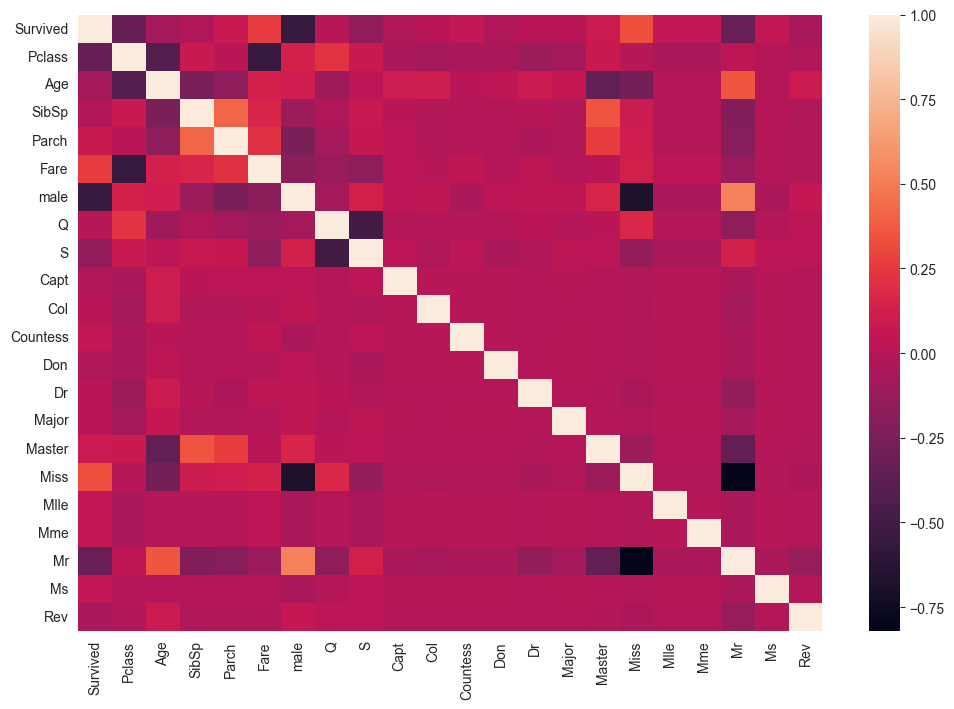

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(df_titanic.corr())

In [63]:
df_titanic.to_csv('cleaned.csv')

In [71]:
df_hotel = pd.read_csv('hotel_bookings.csv')
df_hotel.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [67]:
df_hotel['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [68]:
df_hotel[df_hotel.duplicated]

hotel  is_canceled  lead_time  arrival_date_year   
5       Resort Hotel            0         14               2015  \
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number   
5                    July                        27  \
22                   July                        27   
43                   July                        27   
138                  July                        28   
200                  July                        28   
...                   ...                       ...   
119349             August                        35   
119352             August                        35   
119353             August                        35   
119354             August                        35   
119373             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights   
5                               1                        0  \
22                              1                        2   
43                              2                        2   
138                             5                        1   
200                             7                        0   
...                           ...                      ...   
119349                         31                        0   
119352                         31                        0   
119353                         31                        0   
119354                         31                        0   
119373                         31                        1   

        stays_in_week_nights  adults  ...  deposit_type  agent company   
5                          2       2  ...    No Deposit  240.0     NaN  \
22                         4       2  ...    No Deposit  250.0     NaN   
43                         3       2  ...    No Deposit  250.0     NaN   
138                        0       2  ...    No Deposit  240.0     NaN   
200                        1       1  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119349                     3       2  ...    No Deposit    9.0     NaN   
119352                     3       3  ...    No Deposit    9.0     NaN   
119353                     3       3  ...    No Deposit    9.0     NaN   
119354                     3       3  ...    No Deposit    9.0     NaN   
119373                     3       1  ...    No Deposit   42.0     NaN   

       days_in_waiting_list    customer_type     adr   
5                         0        Transient   98.00  \
22                        0        Transient   84.67   
43                        0        Transient  137.00   
138                       0        Transient   97.00   
200                       0        Transient  109.80   
...                     ...              ...     ...   
119349                    0        Transient  126.00   
119352                    0  Transient-Party  195.33   
119353                    0  Transient-Party  195.33   
119354                    0  Transient-Party  195.33   
119373                    0        Transient   82.35   

        required_car_parking_spaces  total_of_special_requests   
5                                 0                          1  \
22                                0                          1   
43                                0         

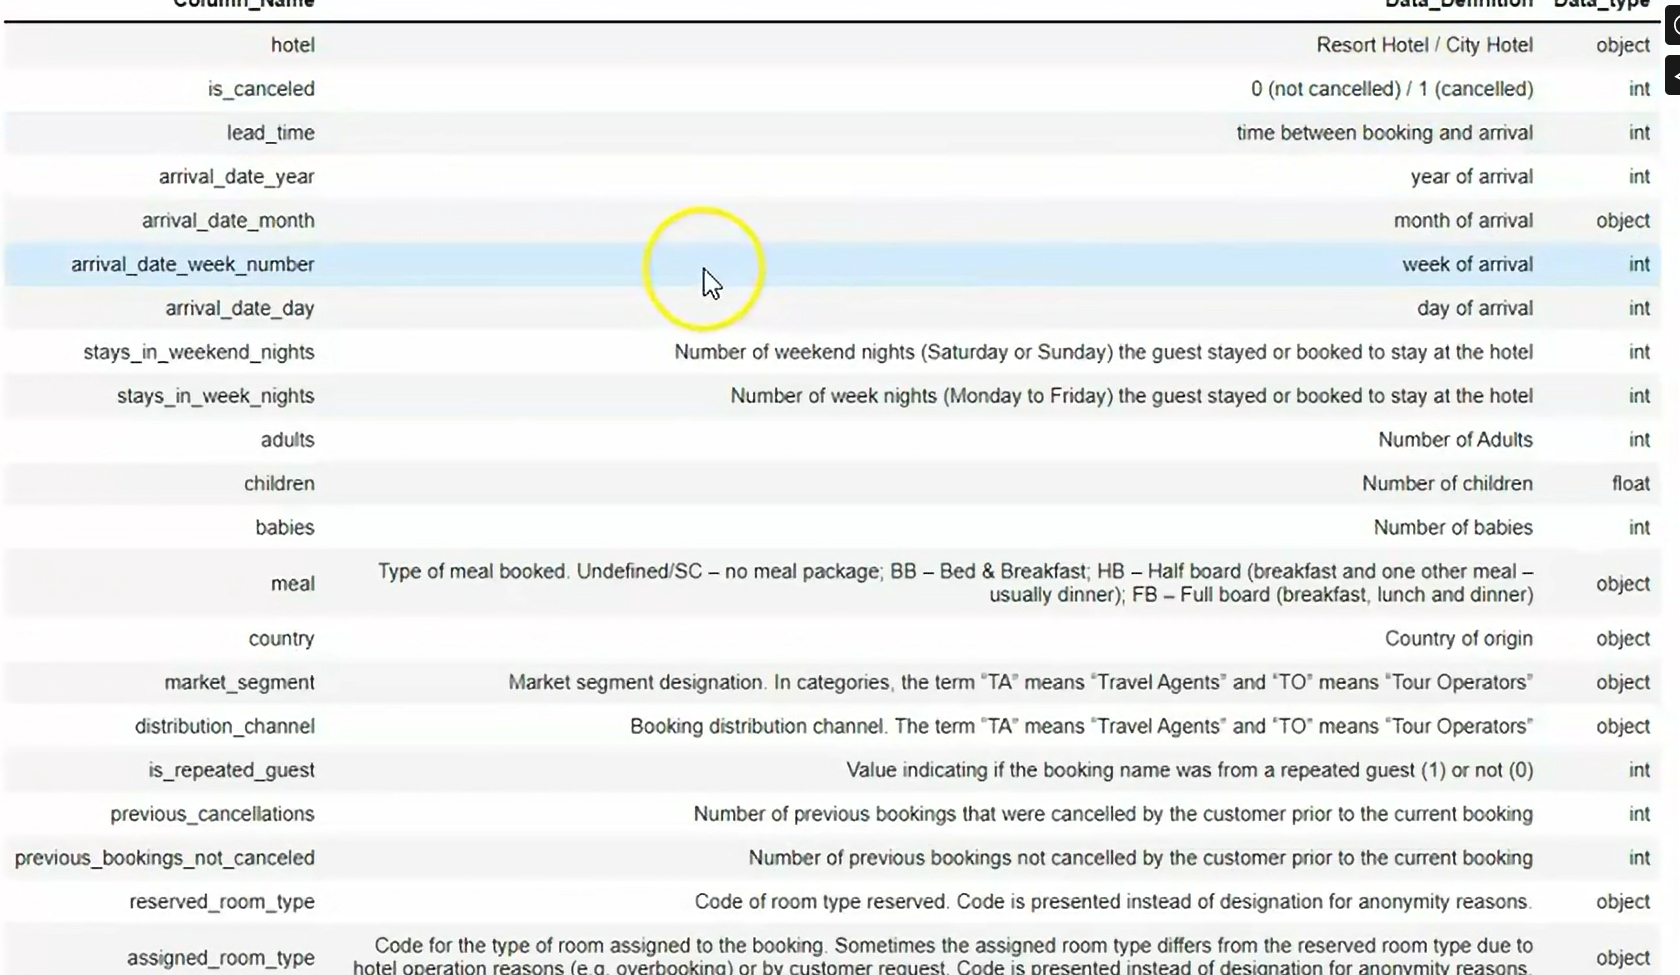

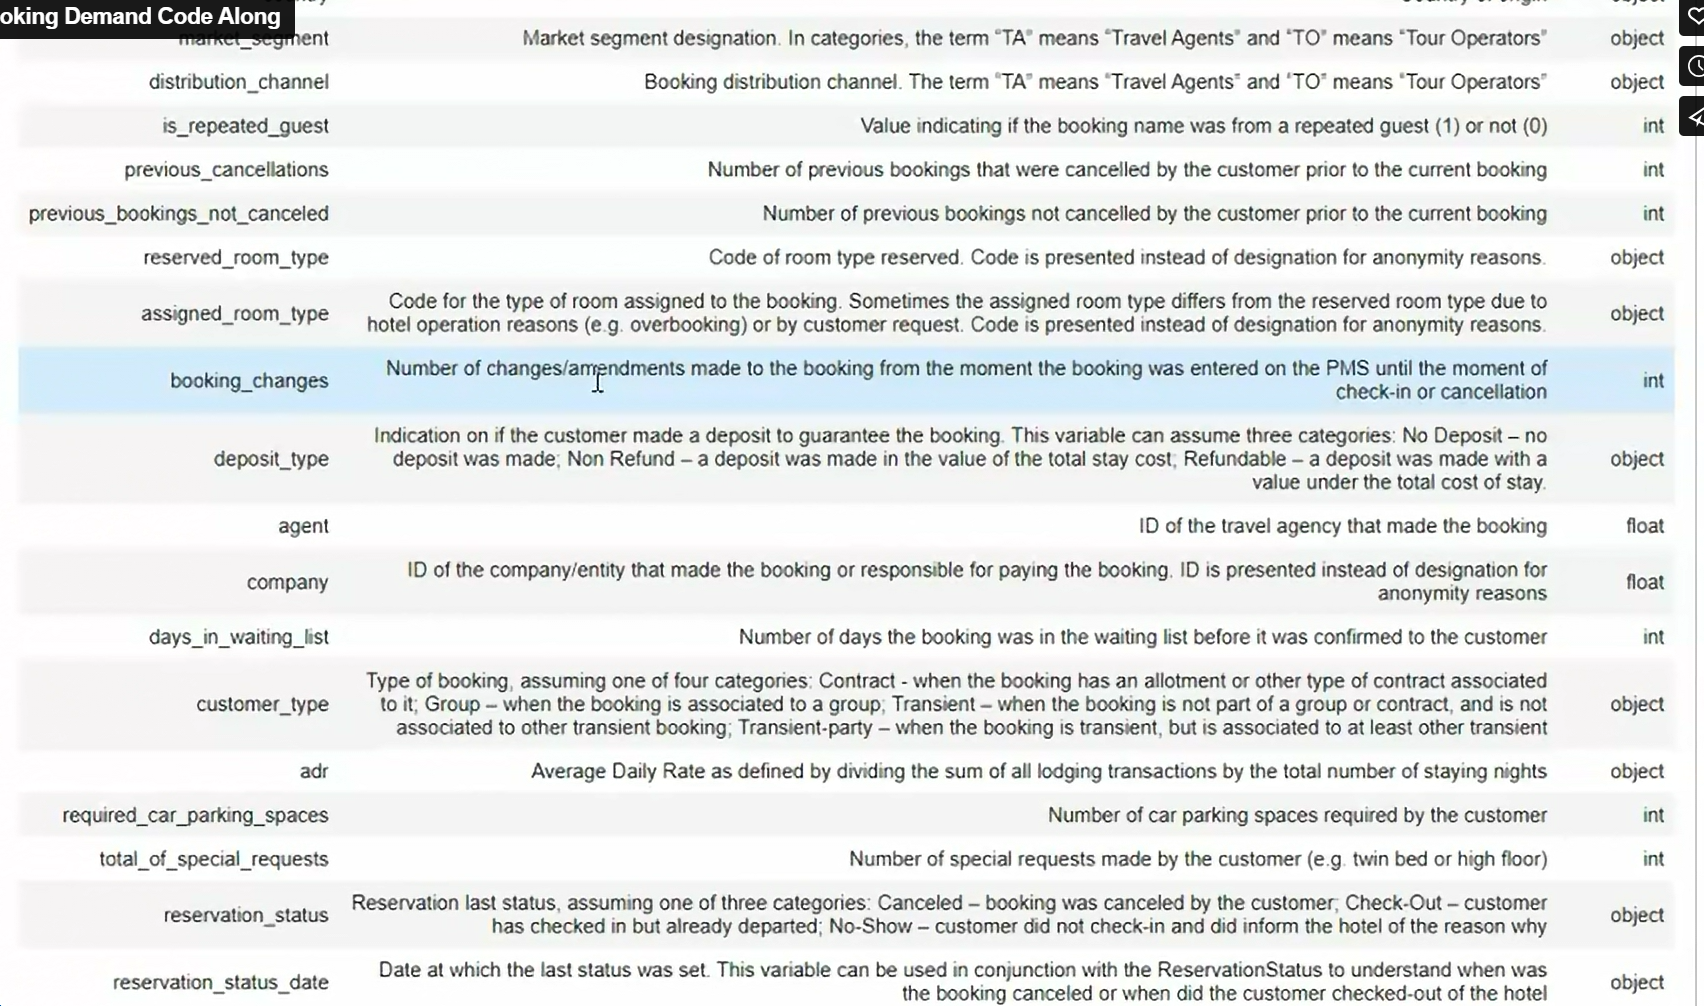

In [72]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [74]:
df_hotel.drop(['company', 'agent'], axis=1, inplace=True)

In [77]:
df_hotel['adults'].dtype

dtype('int64')

In [82]:
df_hotel = df_hotel[df_hotel['adults'] != 0]

In [84]:
df_hotel = df_hotel[df_hotel['adr'] >0 ]

In [87]:
df_hotel['arrival_date'] = df_hotel['arrival_date_month'] + " " + df_hotel['arrival_date_day_of_month'].astype(str) + " " + df_hotel['arrival_date_year'].astype(str)
df_hotel['arrival_date'] = pd.to_datetime(df_hotel['arrival_date'])

In [89]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117182 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117182 non-null  object        
 1   is_canceled                     117182 non-null  int64         
 2   lead_time                       117182 non-null  int64         
 3   arrival_date_year               117182 non-null  int64         
 4   arrival_date_month              117182 non-null  object        
 5   arrival_date_week_number        117182 non-null  int64         
 6   arrival_date_day_of_month       117182 non-null  int64         
 7   stays_in_weekend_nights         117182 non-null  int64         
 8   stays_in_week_nights            117182 non-null  int64         
 9   adults                          117182 non-null  int64         
 10  children                        117178 non-null  float64     

In [90]:
df_hotel.drop('arrival_date_week_number', axis=1, inplace=True)

In [91]:
df_hotel['country'].mode()

0    PRT
Name: country, dtype: object

In [93]:
df_hotel.loc[df_hotel['country'] == 'PRT', 'country'].count()

46989

In [98]:
df_hotel['country'].fillna(df_hotel['country'].mode()[0], inplace=True)

In [103]:
df_hotel.isnull().sum().sort_values(ascending=False)

children                          4
hotel                             0
previous_cancellations            0
reservation_status_date           0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
is_repeated_guest                 0
is_canceled                       0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_month                0
arrival_date_year           

In [106]:
df_hotel['children'].median()

0.0

In [107]:
df_hotel['children'].fillna(df_hotel['children'].median(), inplace=True)

In [108]:
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [109]:
df_hotel['total_guest'] = df_hotel['adults'] + df_hotel['children'] + df_hotel['babies']

In [110]:
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [115]:
df_hotel

hotel  is_canceled  lead_time  arrival_date_year   
2       Resort Hotel            0          7               2015  \
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_day_of_month  stays_in_weekend_nights   
2                    July                          1                        0  \
3                    July                          1                        0   
4                    July                          1                        0   
5                    July                          1                        0   
6                    July                          1                        0   
...                   ...                        ...                      ...   
119385             August                         30                        2   
119386             August                         31                        2   
119387             August                         31                        2   
119388             August                         31                        2   
119389             August                         29                        2   

        stays_in_week_nights  adults  children  ...  deposit_type   
2                          1       1       0.0  ...    No Deposit  \
3                          1       1       0.0  ...    No Deposit   
4                          2       2       0.0  ...    No Deposit   
5                          2       2       0.0  ...    No Deposit   
6                          2       2       0.0  ...    No Deposit   
...                      ...     ...       ...  ...           ...   
119385                     5       2       0.0  ...    No Deposit   
119386                     5       3       0.0  ...    No Deposit   
119387                     5       2       0.0  ...    No Deposit   
119388                     5       2       0.0  ...    No Deposit   
119389                     7       2       0.0  ...    No Deposit   

       days_in_waiting_list customer_type     adr required_car_parking_spaces   
2                         0     Transient   75.00                           0  \
3                         0     Transient   75.00                           0   
4                         0     Transient   98.00                           0   
5                         0     Transient   98.00                           0   
6                         0     Transient  107.00                           0   
...                     ...           ...     ...                         ...   
119385                    0     Transient   96.14                           0   
119386                    0     Transient  225.43                           0   
119387                    0     Transient  157.71                           0   
119388                    0     Transient  104.40                           0   
119389                    0     Transient  151.20                           0   

        total_of_special_requests  reservation_status   
2                               0           Check-Out  \
3                               0           Check-Out   
4                               1           Check-Out   
5                               1           Check-Out   
6                               0           Check-Out   
...                           ...                 ...   
119385                          0   

<Axes: xlabel='hotel', ylabel='count'>

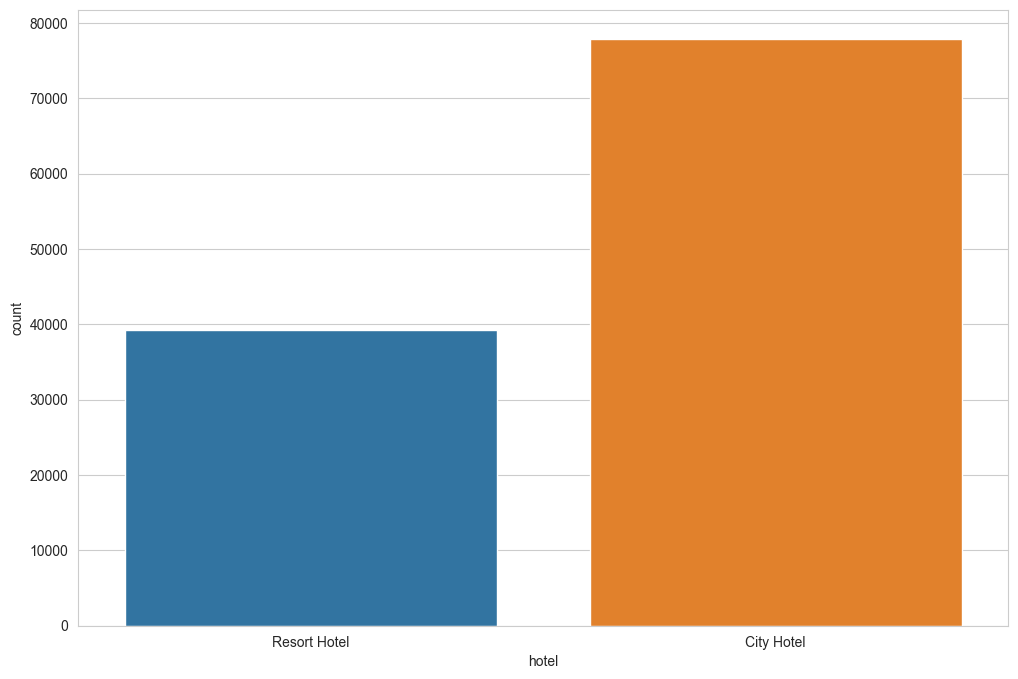

In [112]:
plt.figure(figsize=(12,8))
sns.countplot(x='hotel', data=df_hotel)

In [113]:
df_hotel['hotel'].value_counts(normalize=True)

hotel
City Hotel      0.664565
Resort Hotel    0.335435
Name: proportion, dtype: float64

<Axes: xlabel='hotel', ylabel='count'>

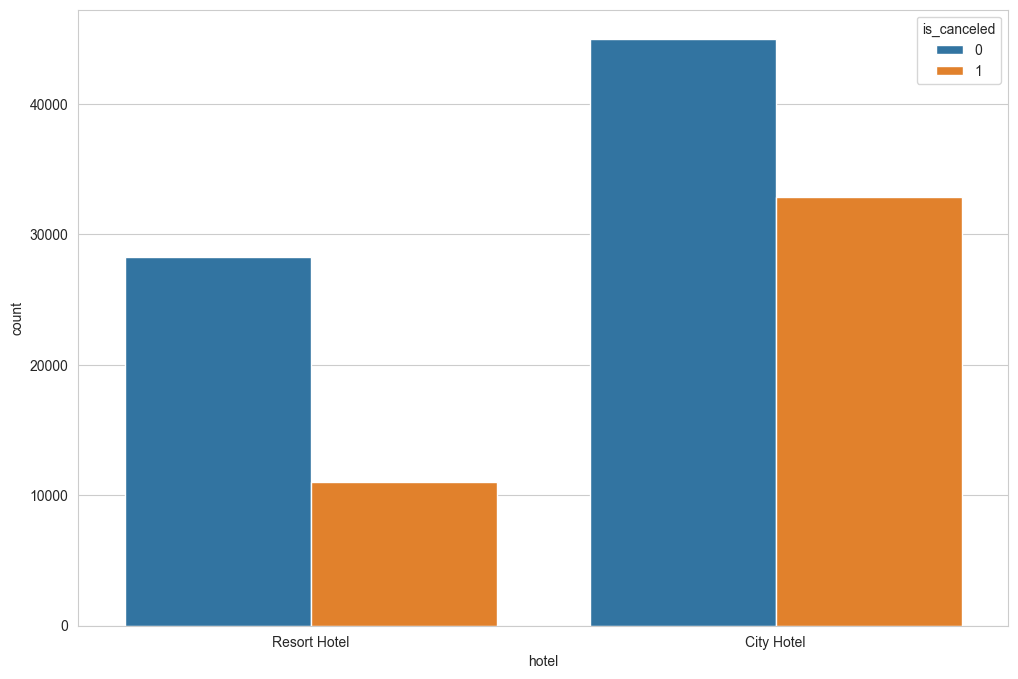

In [114]:
plt.figure(figsize=(12,8))
sns.countplot(x='hotel', hue='is_canceled',data=df_hotel)

<Axes: xlabel='arrival_date_month', ylabel='count'>

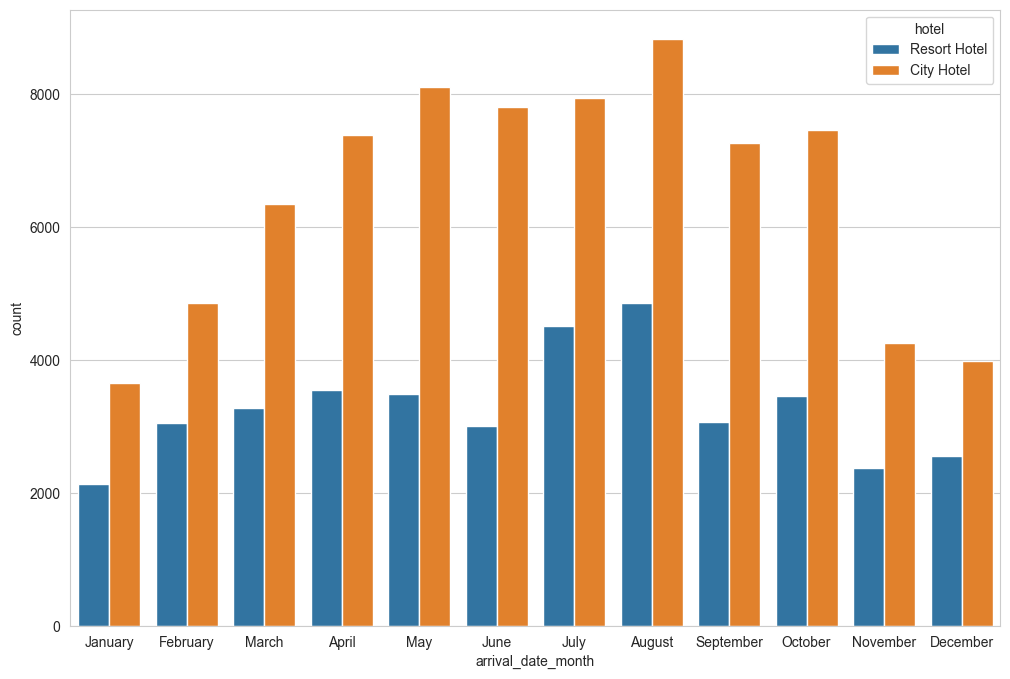

In [120]:
plt.figure(figsize=(12,8))
sns.countplot(x='arrival_date_month', hue='hotel',data=df_hotel, 
              order=['January','February','March','April','May','June','July','August','September','October','November','December'])

From chart above the hotel stays tend to peak during July and Auguts. While on winter from November to February tends to do the worst

<Axes: xlabel='adults', ylabel='count'>

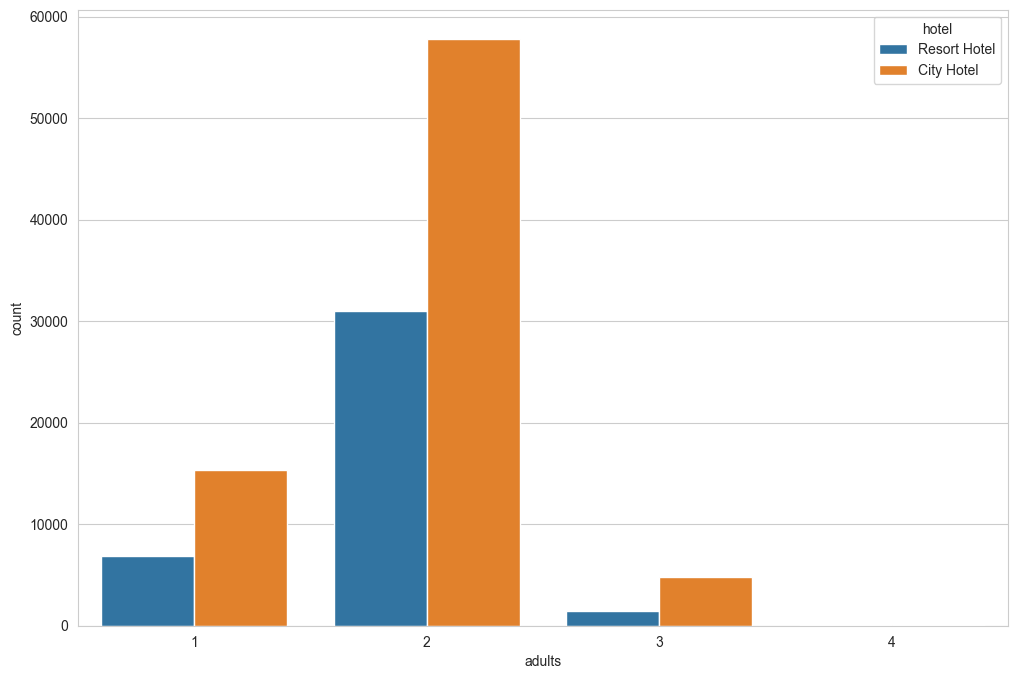

In [122]:
plt.figure(figsize=(12,8))
sns.countplot(x='adults', hue='hotel',data=df_hotel)

<Axes: xlabel='children', ylabel='count'>

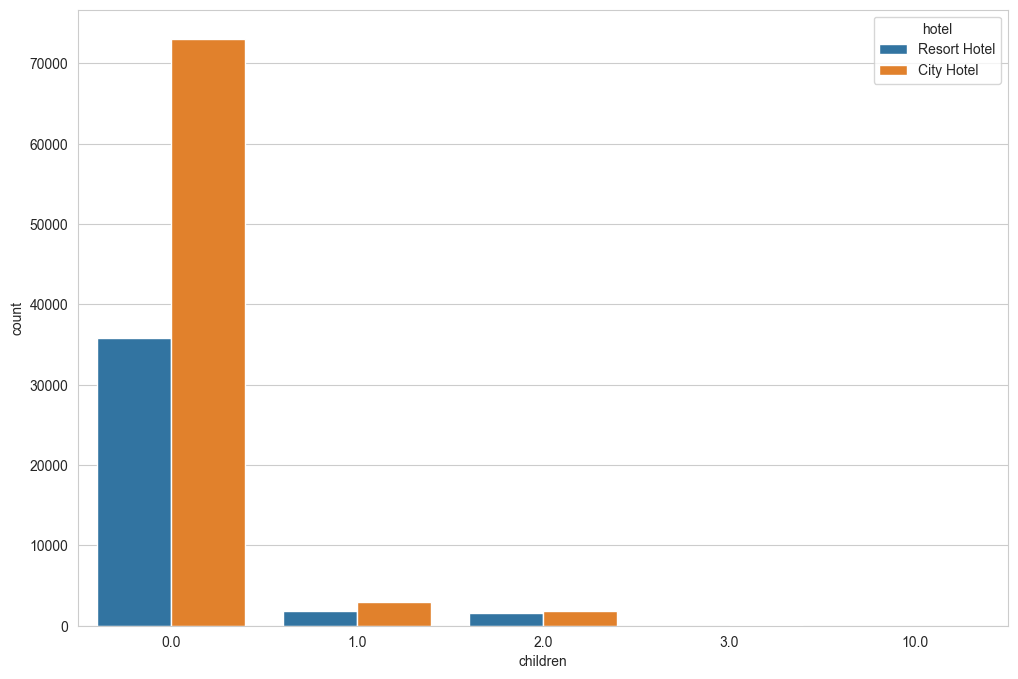

In [125]:
plt.figure(figsize=(12,8))
sns.countplot(x='children', hue='hotel',data=df_hotel)

Text(0, 0.5, 'Total Guests Count')

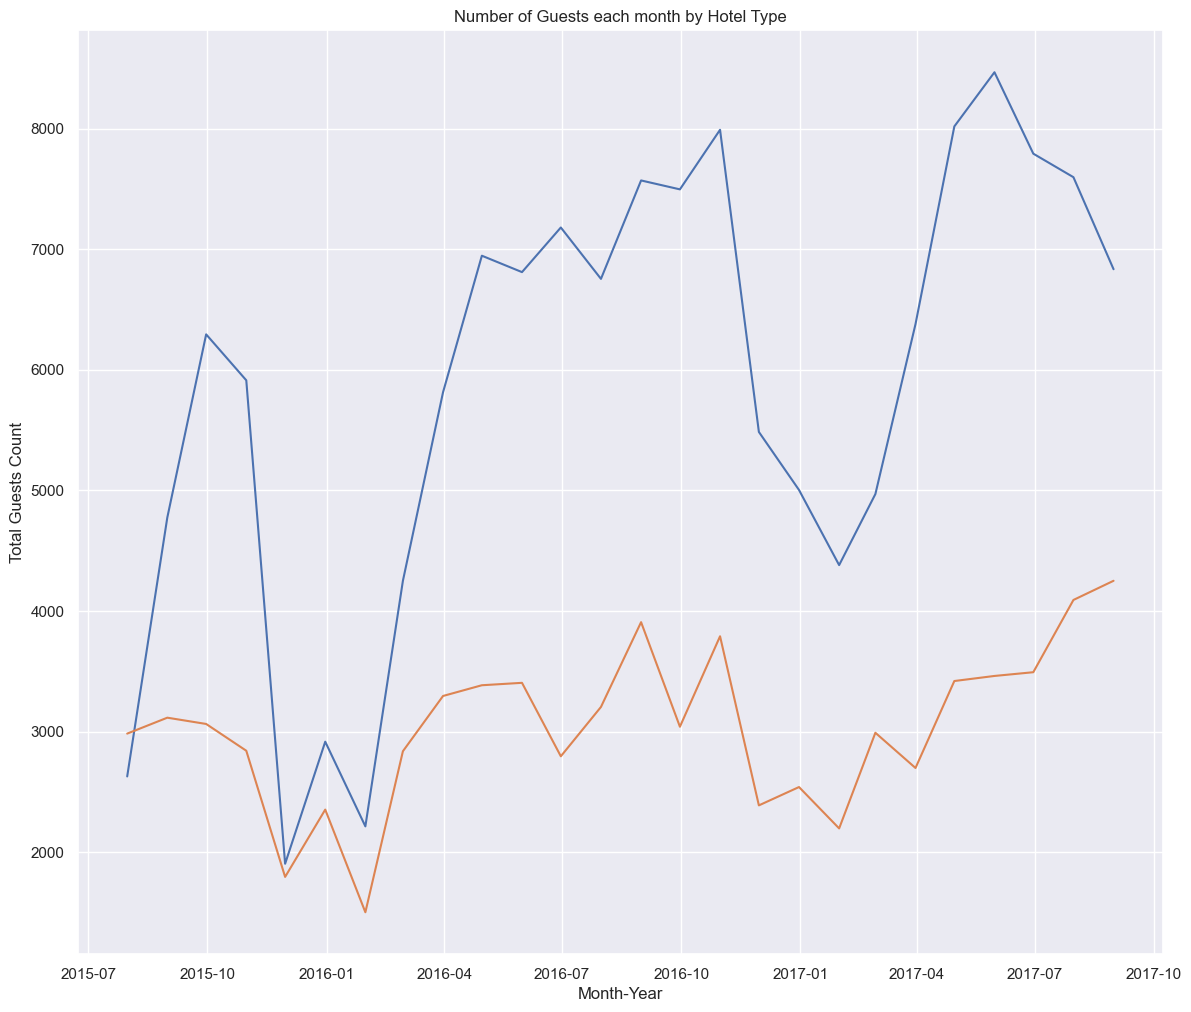

In [129]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
data=df_hotel[df_hotel['hotel']=='City Hotel'].groupby(pd.Grouper(key='arrival_date',
    axis=0, freq='M')).sum().reset_index(),
    x='arrival_date',
    y='total_guest',
    ax=ax
)
sns.lineplot(
data=df_hotel[df_hotel['hotel']=='Resort Hotel'].groupby(pd.Grouper(key='arrival_date',
    axis=0, freq='M')).sum().reset_index(),
    x='arrival_date',
    y='total_guest',
    ax=ax
)

ax.set(title='Number of Guests each month by Hotel Type')
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Total Guests Count', fontsize=12)

The number of guests coming to the City Hotel is twice that of Resort Hotel. In Jan 2016, the number guest plunged to an all time low

Text(0, 0.5, 'Parking Demmand Count')

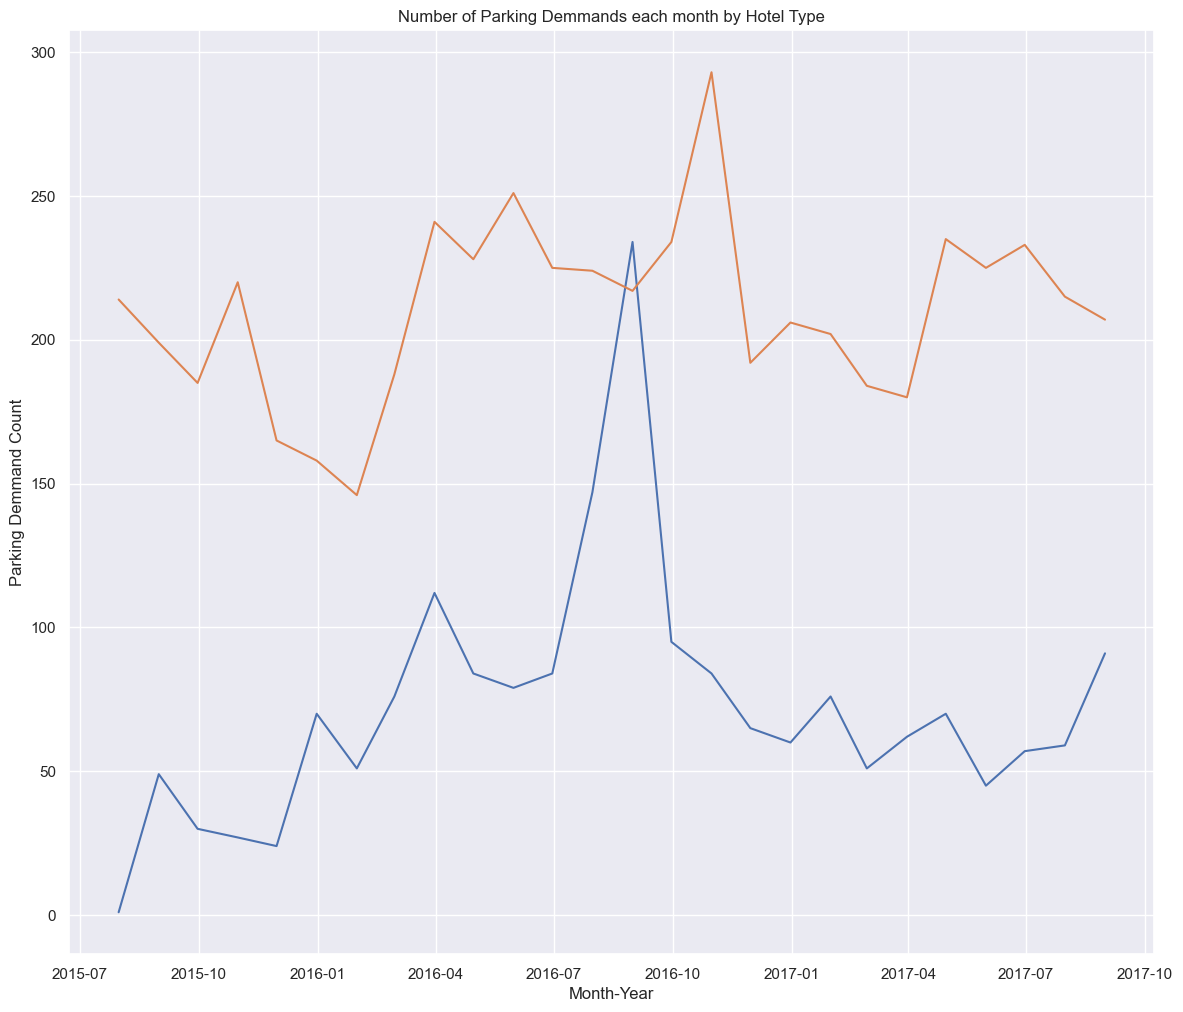

In [133]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
data=df_hotel[df_hotel['hotel']=='City Hotel'].groupby(pd.Grouper(key='arrival_date',
    axis=0, freq='M')).sum().reset_index(),
    x='arrival_date',
    y='required_car_parking_spaces',
    ax=ax
)
sns.lineplot(
data=df_hotel[df_hotel['hotel']=='Resort Hotel'].groupby(pd.Grouper(key='arrival_date',
    axis=0, freq='M')).sum().reset_index(),
    x='arrival_date',
    y='required_car_parking_spaces',
    ax=ax
)

ax.set(title='Number of Parking Demmands each month by Hotel Type')
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Parking Demmand Count', fontsize=12)

Task Analysis:
1. The tourist come from
2. Frequency when to tourist come 

Conclusion
1. Reservation City Hotel > Resort Hotel
2. Cancelation City Hotel > Resort Hotel
3. Peak at August
4. Majority 2 adults followed 1
5. Most without childer, with smal having 1 or 2 children
6. Parking demand peak at August for City Hotel and October for Resort Hotel

Recomm
1. Resort hotel at the end of the summer is at the peak of tourist comming. So to attract more ads at that time of months before peak
2. Parking spaces in middle of the years had a high demmand so recommend to invest on middle of the year
3. Most of the is a couple so made an ads to attract couple
